# Overview of Notebook

After the initial classification of trigger events related to the article, the article is passed into this notebook and a predictive risk score is assigned to every article.


This notebook is split into 3 sections
- Importing of Libraries and reading of article(s) data
- Processing the article(s) data and scoring it based on a predefined risk scoring framework
- Plotting the article(s) data in a 3D Risk Scoring Cube

Outputs:
- CSV file with 3 additional columns: "mid_working_article.csv"
    - New Severity Score
    - New Human Control Score
    - New Likelihood Score
- A image of the 3D Risk Scoring Cube: "3D_Risk_Scoring_Cube.png"
    

# Importing Libraries and Reading Data

In [53]:
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [54]:
df = pd.read_csv("initial_article.csv", index_col = [0])
df.head()

,Article Link,content summary,news title,date,Preprocessed_Text,Preprocessed_Text2,trigger event
0,https://www.channelnewsasia.com/world/ukraine-...,Ukraine used to export almost all its grain an...,Ukraine says grain on ships in blocked Black S...,NaN,"['ukraine', 'used', 'export', 'almost', 'grain...",ukraine used export almost grain oilseed via s...,Military Conflicts


# Risk Scoring Framework Adapted from McKinsey Research Report

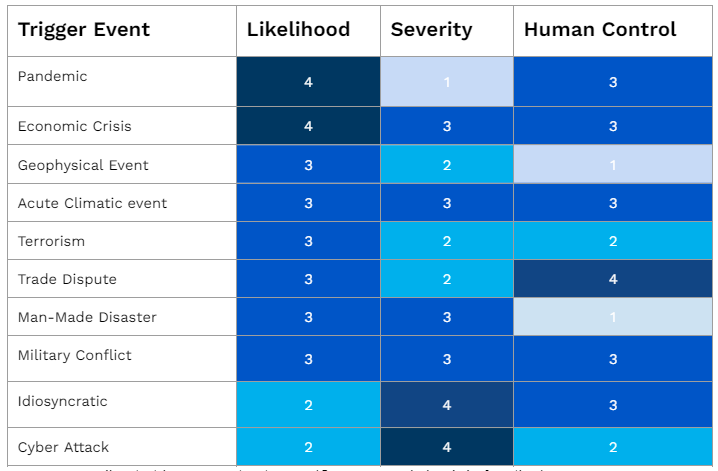

# Creating Initial Likelihood, Severity and Human Control Score

- Scoring is done based on the trigger event associated with the individual risk scores from the risk scoring framework mention above

In [55]:
def create_likelihood_score(x):
    if x == 'idiosyncratic':
        return 2
    elif x == 'geophysical event':
        return 3
    elif x == 'cyberattack':
        return 2
    elif x == 'Terrorism':
        return 3
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 4
    elif x == 'pandemic':
        return 4
    elif x == 'Trade Dispute':
        return 3
    elif x == 'Man-Made Disaster':
        return 3
    else:
        return 3
        
def create_human_control_score(x):
    if x == 'idiosyncratic':
        return 3
    elif x == 'geophysical event':
        return 1
    elif x == 'cyberattack':
        return 2
    elif x == 'Terrorism':
        return 2
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 3
    elif x == 'pandemic':
        return 3
    elif x == 'Trade Dispute':
        return 4
    elif x == 'Man-Made Disaster':
        return 1
    else:
        return 3
    
def create_severity_score(x):
    if x == 'idiosyncratic':
        return 4
    elif x == 'geophysical event':
        return 2
    elif x == 'cyberattack':
        return 4
    elif x == 'Terrorism':
        return 2
    elif x == 'Military Conflicts':
        return 3
    elif x == 'Economic Crisis':
        return 3
    elif x == 'pandemic':
        return 1
    elif x == 'Trade Dispute':
        return 2
    elif x == 'Man-Made Disaster':
        return 3
    else:
        return 3

In [56]:
df['Likelihood Score'] = df['trigger event'].apply(create_likelihood_score)
df['Severity Score'] = df['trigger event'].apply(create_severity_score)
df['Human Control Score'] = df['trigger event'].apply(create_human_control_score)

In [57]:
df.head()

,Article Link,content summary,news title,date,Preprocessed_Text,Preprocessed_Text2,trigger event,Likelihood Score,Severity Score,Human Control Score
0,https://www.channelnewsasia.com/world/ukraine-...,Ukraine used to export almost all its grain an...,Ukraine says grain on ships in blocked Black S...,NaN,"['ukraine', 'used', 'export', 'almost', 'grain...",ukraine used export almost grain oilseed via s...,Military Conflicts,3,3,3


# Finetuning Severity Score

## VADER Sentiment Analysis

Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, whether a whole document, paragraph, sentence, or clause.

Sentiment analysis aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.




- This portion of the notebook aims to use VADER Sentiment Analysis to analyse the sentiment of the content summary of the article that is passed through.

In [58]:
import pandas as pd
import re 

import nltk 
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download the lexicon
# nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

In [59]:
df["sentiment score"] = df['Preprocessed_Text2'].apply(lambda x: sent_analyzer.polarity_scores(x))
df.head()

,Article Link,content summary,news title,date,Preprocessed_Text,Preprocessed_Text2,trigger event,Likelihood Score,Severity Score,Human Control Score,sentiment score
0,https://www.channelnewsasia.com/world/ukraine-...,Ukraine used to export almost all its grain an...,Ukraine says grain on ships in blocked Black S...,NaN,"['ukraine', 'used', 'export', 'almost', 'grain...",ukraine used export almost grain oilseed via s...,Military Conflicts,3,3,3,"{'neg': 0.123, 'neu': 0.809, 'pos': 0.067, 'co..."


In [60]:
def get_compound_score(sentimentScore):
    return sentimentScore['compound']

def format_data(sentimentScore):
    
    if sentimentScore['compound'] >= 0.5:
        return 'positive'
    elif sentimentScore['compound'] <= -0.5:
        return 'negative'
    elif sentimentScore['compound'] > -0.5 or sentimentScore['compound'] < 0.5:
        return 'neutral'

# Apply the transformation
df["compound score"] = df['sentiment score'].apply(lambda x: get_compound_score(x))
df["sentiment label"] = df['sentiment score'].apply(lambda x: format_data(x))
df

,Article Link,content summary,news title,date,Preprocessed_Text,Preprocessed_Text2,trigger event,Likelihood Score,Severity Score,Human Control Score,sentiment score,compound score,sentiment label
0,https://www.channelnewsasia.com/world/ukraine-...,Ukraine used to export almost all its grain an...,Ukraine says grain on ships in blocked Black S...,NaN,"['ukraine', 'used', 'export', 'almost', 'grain...",ukraine used export almost grain oilseed via s...,Military Conflicts,3,3,3,"{'neg': 0.123, 'neu': 0.809, 'pos': 0.067, 'co...",-0.6249,negative


## Finetuning Severity Score Based on Sentiment Label

In [61]:
df['New Severity Score'] = df['Severity Score']

In [62]:
for i in range(len(df)):
    severity_score = df["Severity Score"].loc[i]
    sentiment_label = df["sentiment label"].loc[i]
    compound_score = df["compound score"].loc[i]
    
#     print(compound_score)
    
    if sentiment_label == "negative":
#         print(compound_score)
        compound_score = -compound_score
        mid = compound_score + severity_score
#         print(f"{sentiment_label}: {test}")
        if mid > 4:
            mid = 4
        df["New Severity Score"].loc[i] = mid
    elif sentiment_label == "positive":
#         test = compound_score * severity_score
#         print(f"{sentiment_label}: {test}")
        df["New Severity Score"].loc[i] = severity_score - compound_score 
    elif sentiment_label == "neutral":
#         test = compound_score * severity_score
#         print(f"{sentiment_label}: {severity_score}")
        df["New Severity Score"].loc[i] = severity_score

        
    

C:\Users\Darren\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [63]:
df.head()

,Article Link,content summary,news title,date,Preprocessed_Text,Preprocessed_Text2,trigger event,Likelihood Score,Severity Score,Human Control Score,sentiment score,compound score,sentiment label,New Severity Score
0,https://www.channelnewsasia.com/world/ukraine-...,Ukraine used to export almost all its grain an...,Ukraine says grain on ships in blocked Black S...,NaN,"['ukraine', 'used', 'export', 'almost', 'grain...",ukraine used export almost grain oilseed via s...,Military Conflicts,3,3,3,"{'neg': 0.123, 'neu': 0.809, 'pos': 0.067, 'co...",-0.6249,negative,3.6249


# Finetuning Human Control Score

In [64]:
import re
import string
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

edited_stopwords = stopwords
for i in stopwords.copy():
    if i == 'not':
        edited_stopwords.remove(i)
        
        
def preprocess(text):
    

    text = re.sub('\r\n', " ", str(text))
    text = re.sub(r'[0-9]', '', text)
    text = re.sub(r'[^\w\s]', '', str(text))
#     text = re.sub("^\d+\s|\s\d+\s|\s\d+$", "", text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r"[^a-zA-Z]", " ", str(text).lower())
    token = word_tokenize(text)
    

    words = [t for t in token if t not in edited_stopwords]
    
#     return_text = " "
    
#     return_text = return_text.join(words)
    
    return words

In [65]:
df['new content summary'] = df['content summary'].apply(preprocess)

In [66]:
df.head()

,Article Link,content summary,news title,date,Preprocessed_Text,Preprocessed_Text2,trigger event,Likelihood Score,Severity Score,Human Control Score,sentiment score,compound score,sentiment label,New Severity Score,new content summary
0,https://www.channelnewsasia.com/world/ukraine-...,Ukraine used to export almost all its grain an...,Ukraine says grain on ships in blocked Black S...,NaN,"['ukraine', 'used', 'export', 'almost', 'grain...",ukraine used export almost grain oilseed via s...,Military Conflicts,3,3,3,"{'neg': 0.123, 'neu': 0.809, 'pos': 0.067, 'co...",-0.6249,negative,3.6249,"[ukraine, used, export, almost, grain, oilseed..."


In [67]:
df['mid_working'] = df['new content summary']

In [68]:
df['New Human Control Score'] = df['Human Control Score']

### Adding/Deleting Key Words Associated with Human Control

- The code block below is editable, such as adding more words as well as the magnitude of change that is caused by these words being present in the article summary itself

In [69]:
decrease_human_control_words = {0.2:['foreseeable','anticipated','predictable','planned'], 0.3:["expected"]}

increase_human_control_words = {0.2:['unforeseeable','unexpected','unpredictable','unanticipated','unplanned']}

list_of_inverter_words = ['not']

### Main Function to Finetune Human Control Score

In [70]:

for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_human_control_score = df['Human Control Score'].iloc[i]
    
    for t in list_of_words:
#         if t in decrease_human_control_words:
        for key,value in decrease_human_control_words.items():
            if t in value:
                position = list_of_words.index(t)
                
                if list_of_words[position-1] == 'not':
                    print(list_of_words[position-1] + " " +list_of_words[position])
                
                    to_be_returned = initial_human_control_score + key
                    word = list_of_words[position-1] + " " +list_of_words[position]
                else:
                    to_be_returned = initial_human_control_score - key
                    word = t

            
                if to_be_returned > 4:
                    to_be_returned = 4
        
                print(f"{word} found at index {i}") 
                print(f"Intial Human Control Score: {initial_human_control_score}")
                initial_human_control_score = to_be_returned
                print(f"Edited Human Control Score: {to_be_returned}")
                print("/")
                df['New Human Control Score'].iloc[i] = to_be_returned
            
for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_human_control_score = df['New Human Control Score'].iloc[i]
    
    for t in list_of_words:
#         if t in decrease_human_control_words:
        for key,value in increase_human_control_words.items():
            if t in value:
                to_be_returned = initial_human_control_score + key
#                 print(to_be_returned)
                
                
    
            
                if to_be_returned > 4:
                    to_be_returned = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Human Control Score: {initial_human_control_score}")
                initial_human_control_score = to_be_returned
                print(f"Edited Human Control Score: {to_be_returned}")
                print("/")
                df['New Human Control Score'].iloc[i] = to_be_returned
    


In [71]:
df.head()

,Article Link,content summary,news title,date,Preprocessed_Text,Preprocessed_Text2,trigger event,Likelihood Score,Severity Score,Human Control Score,sentiment score,compound score,sentiment label,New Severity Score,new content summary,mid_working,New Human Control Score
0,https://www.channelnewsasia.com/world/ukraine-...,Ukraine used to export almost all its grain an...,Ukraine says grain on ships in blocked Black S...,NaN,"['ukraine', 'used', 'export', 'almost', 'grain...",ukraine used export almost grain oilseed via s...,Military Conflicts,3,3,3,"{'neg': 0.123, 'neu': 0.809, 'pos': 0.067, 'co...",-0.6249,negative,3.6249,"[ukraine, used, export, almost, grain, oilseed...","[ukraine, used, export, almost, grain, oilseed...",3


# Finetuning Likelihood Score

In [72]:
df['New Likelihood Score'] = df['Likelihood Score']  -1

### Adding/Deleting Key Words Associated with Human Control

- The code block below is editable, such as adding more words as well as the magnitude of change that is caused by these words being present in the article summary itself

In [73]:
decrease_likelihood_words = {0.2: ['improbable'], 0.3: ['unlikely']}
increase_likelihood_words = {0.2: ['grain','likely','probable','cameron','highlands','johor'], 1:['malaysia']}
list_of_inverter_words = ['not']

### Main Function to Finetune Likelihood Score

In [74]:

for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_likelihood_score = df['Likelihood Score'].iloc[i]
    
    for t in list_of_words:
        for key,value in decrease_likelihood_words.items():
            if t in value:
                position = list_of_words.index(t)
                
                if list_of_words[position-1] == 'not':
                    print(list_of_words[position-1] + " " +list_of_words[position])
                
                    to_be_returned2 = initial_likelihood_score + key
                    word = list_of_words[position-1] + " " +list_of_words[position]
                else:
                    to_be_returned2 = initial_likelihood_score - key
                    word = t
                    
                if to_be_returned2 > 4:
                    to_be_returned2 = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Likelihood Score: {initial_likelihood_score}")
                initial_likelihood_score = to_be_returned2
                print(f"Edited Likelihood Score: {to_be_returned2}")
                print("/")
                df['New Likelihood Score'].iloc[i] = to_be_returned2
            
for i in range(len(df)):
    list_of_words = df['mid_working'].iloc[i]
    initial_likelihood_score = df['New Likelihood Score'].iloc[i]
    
    for t in list_of_words:
        for key,value in increase_likelihood_words.items():
            if t in value:
                
                position = list_of_words.index(t)
                if list_of_words[position-1] == 'not':
                    print(list_of_words[position-1] + " " +list_of_words[position])
                    to_be_returned2 = initial_likelihood_score - key
                    word = list_of_words[position-1] + " " +list_of_words[position]
                    
                else:
                    to_be_returned2 = initial_likelihood_score + key
                    word = t
            
                if to_be_returned2 > 4:
                    to_be_returned2 = 4
        
                print(f"{t} found at index {i}") 
                print(f"Intial Likelihood Score: {initial_likelihood_score}")
                initial_likelihood_score = to_be_returned2
                print(f"Edited Likelihood Score: {to_be_returned2}")
                print("/")
                df['New Likelihood Score'].iloc[i] = to_be_returned2
    


grain found at index 0
Intial Likelihood Score: 2
Edited Likelihood Score: 2.2
/
grain found at index 0
Intial Likelihood Score: 2.2
Edited Likelihood Score: 2.4000000000000004
/
grain found at index 0
Intial Likelihood Score: 2.4000000000000004
Edited Likelihood Score: 2.6000000000000005
/
grain found at index 0
Intial Likelihood Score: 2.6000000000000005
Edited Likelihood Score: 2.8000000000000007
/
grain found at index 0
Intial Likelihood Score: 2.8000000000000007
Edited Likelihood Score: 3.000000000000001
/
grain found at index 0
Intial Likelihood Score: 3.000000000000001
Edited Likelihood Score: 3.200000000000001
/


C:\Users\Darren\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [75]:
df.head()

,Article Link,content summary,news title,date,Preprocessed_Text,Preprocessed_Text2,trigger event,Likelihood Score,Severity Score,Human Control Score,sentiment score,compound score,sentiment label,New Severity Score,new content summary,mid_working,New Human Control Score,New Likelihood Score
0,https://www.channelnewsasia.com/world/ukraine-...,Ukraine used to export almost all its grain an...,Ukraine says grain on ships in blocked Black S...,NaN,"['ukraine', 'used', 'export', 'almost', 'grain...",ukraine used export almost grain oilseed via s...,Military Conflicts,3,3,3,"{'neg': 0.123, 'neu': 0.809, 'pos': 0.067, 'co...",-0.6249,negative,3.6249,"[ukraine, used, export, almost, grain, oilseed...","[ukraine, used, export, almost, grain, oilseed...",3,3.2


### Creating CSV Output

In [76]:
df.to_csv("mid_working_article.csv")

# Creating And Plotting The 3D Risk Scoring Cube

-  This section of the notebook is to create the 3D Risk Scoring Cube for visualisations when there are many articles that are being passed into this notebook.

<IPython.core.display.Javascript object>


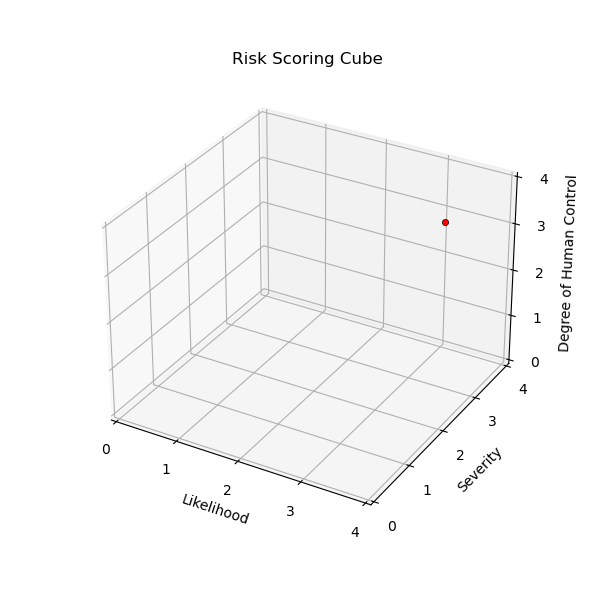

In [77]:
threedee = plt.figure(figsize=(6,6)).gca(projection='3d')
# threedee.scatter(df['Likelihood Score'], df['Severity Score'], df['Human Control Score'], color ='r')
threedee.set_xlabel('Likelihood')
threedee.set_zlabel('Degree of Human Control')
threedee.set_ylabel('Severity')




for i in range(len(df)):
    likelihood_score = df["New Likelihood Score"].loc[i]
    severity_score = df["New Severity Score"].loc[i]
    human_control_score = df["New Human Control Score"].loc[i]
#     annotation = df["new_class_name"].loc[i]
    
    if likelihood_score <= 2:
#         print("Test!")
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='g',  marker = 'o', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c ='#FFBF00', marker = 'o', linewidth = 0.5, edgecolors = 'black')
    elif likelihood_score >= 3:
        if severity_score <= 2:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = '#FFBF00', marker = 'o', linewidth = 0.5, edgecolors = 'black')
        elif severity_score >= 3:
            threedee.scatter(likelihood_score, severity_score, human_control_score, c = 'r',  marker = 'o', linewidth = 0.5, edgecolors = 'black')
#             threedee.text(likelihood_score, severity_score, human_control_score,  '%s' % (annotation), size=10, zorder=1,  color='k') 
                
    
threedee.set_title("Risk Scoring Cube")
# Setting the limits of each axes
threedee.set_xlim(0,4)
threedee.set_ylim(0,4)
threedee.set_zlim(0,4)

# Setting the gridlines
threedee.set_xticks([0,1,2,3,4])
threedee.set_yticks([0,1,2,3,4])
threedee.set_zticks([0,1,2,3,4])


plt.savefig("3D_Risk_Scoring_Cube.png")

plt.show()

# End of Second Notebook

Proceed on to the last notebook: [Report Generator](./Report%20Generator.ipynb)